# Decision rules

In [2]:
import numpy as np
import matplotlib.pyplot as plt  
from   matplotlib import colors

import torch
import torch.nn as nn
from   torch.utils.data import Dataset, DataLoader

In [ ]:
def blob(cl, num, pos, std, angle=0):
    X =  np.random.normal( 0.0, 1.0, (num,2))
    Y =  np.full((2,3), 5)   
    X = X*std
    x, a = np.copy(X), np.pi*angle/180.
    X[:,0] =  x[:,0]*np.cos(a) + x[:,1]*np.sin(a)
    X[:,1] = -x[:,0]*np.sin(a) + x[:,1]*np.cos(a)
    X += pos
    Y =  np.full((num,), cl)   
    return X, Y

## Dataset

(500, 2) (500,)


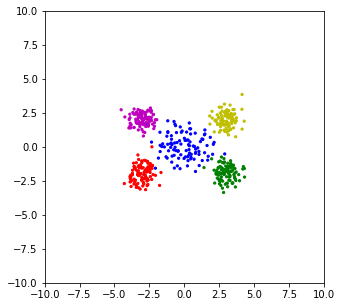

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [106]:
s = 0.5
#pos = [ [0,2],   [-3,-2], [3,-2]  ]
#std = [ [s,s], [s,s], [s, s]]
#angl= [  0,           0  ,   0 ]

pos = [ [0,0], [-3,-2], [3,-2], [-3,2], [3,2]  ]
std = [[2*s,2*s], [s,s], [s,s], [s,s], [s,s]] 
angl= [0] * len(pos)


#pos = [ [0,0],    [-5,-5]  ]
#std = [ [2,0.5],  [0.5, 0.5]]
#angl= [  45,       0 ]

for i in range(len(pos)):    
    x, y = blob(i, 100, pos[i], std[i], angl[i])
    X = x if i==0 else np.concatenate([X, x], axis=0)
    Y = y if i==0 else np.concatenate([Y, y], axis=0)      
print(X.shape, Y.shape)
 
plt.figure (figsize=(5, 5), facecolor ='w') 
cmap = colors.ListedColormap(['blue', 'red', 'green', 'm', 'y'])
ax = plt.subplot(1, 1, 1); 
ax.set( xlim=(-10, 10), ylim=(-10, 10)) 
plt.scatter(X[:,0], X[:,1], c=Y,  s=5, cmap=cmap)        
plt.show()                

print(Y)

(150, 2) (150,)


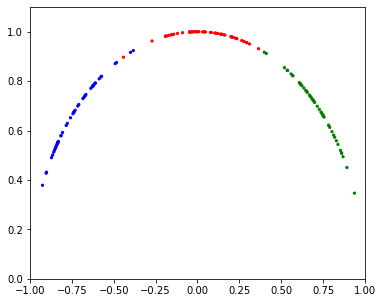

In [63]:
s = 0.2
pos = [ [np.cos(phi*np.pi/180), np.sin(phi*np.pi/180)]  for phi in [135, 90, 45]]
std = [[s,s]] * len(pos)
angl= [0] * len(pos)

for i in range(len(pos)):    
    x, y = blob(i, 50, pos[i], std[i], angl[i])
    X = x if i==0 else np.concatenate([X, x], axis=0)
    Y = y if i==0 else np.concatenate([Y, y], axis=0)      
print(X.shape, Y.shape)
X /= np.linalg.norm(X, axis=1, keepdims=True)  
 
plt.figure (figsize=(6, 5), facecolor ='w') 
cmap = colors.ListedColormap(['b', 'r', 'g'])
ax = plt.subplot(1, 1, 1); 
ax.set( xlim=(-1, 1), ylim=(0, 1.1)) 
plt.scatter(X[:,0], X[:,1], c=Y,  s=5, cmap=cmap)        
plt.show()                

## Batch Loader

In [107]:
class ToyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.int64)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

loader_trn = DataLoader( ToyDataset(X, Y), batch_size=128, shuffle=True,  pin_memory=True)

## Model

In [120]:
class FG(nn.Module):
    def __init__(self, nX, nY, hiddens = []):        
        super(FG, self).__init__()                 # ancestor constructor with this name
      
        self.linear    = nn.Linear(nX, nY, bias=False)        
          
    def forward(self, x):                     
        #x = self.linear(x)
        #x = torch.tanh(x)
        #x = torch.nn.functional.normalize(x)    
        return x

class Model(nn.Module):
    def __init__(self, nX, nY, hiddens = []):        
        super(Model, self).__init__()                 # ancestor constructor with this name
      
        self.fg      = FG(nX, nX)
        self.linear  = nn.Linear(nX, nY)
          
    def forward(self, x):                     
        x = self.fg(x)                
        x = x.view(-1, 1, 2)                            # x: (N,n) -> (N,1,n)
        x  = ((x - self.linear.weight)**2).sum(axis=2)  # weight:(C,n)  x: (N,C) - distanses
        
        
        #x = self.linear(x)       
        return x
    
model = Model(2, len(np.unique(Y)))    
#model(torch.tensor([[0.0, 1.1], [0.0, 1.1], [0.0, 1.1] ]))

In [121]:
loss      = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0)   

def fit(model, loader, train=True):       
    totLoss, totAcc = 0, 0

    model.train(train)                                 # important for Dropout, BatchNorm layers
    for sample in loader:             
        xb, yb = sample                                # current batch      
              
        y = model(xb)                                   # forward propagation
        L = loss(y, yb)                                 # calculate the loss
  
        if train:                                       # we are in learning mode
            optimizer.zero_grad()                       # reset the gradients        
            L.backward()                                # calculate gradients           
            optimizer.step()                            # adjusting parameters
                                     
        totLoss += L.detach()                           # total loss (item from graph)        
        a = y.data.argmax(axis=1)
        totAcc += ( (a == yb).float().mean() )          # class definition accuracy
         
    return totLoss.item()/len(loader), totAcc.item()/len(loader)

epochs = 10000                                           # number of epochs
for epoch in range(1, epochs+1):                          
    L_trn, A_trn = fit(model, loader_trn)                # one epoch        
    
    if epoch % 100 == 0 or epoch == epochs:   # learning output          
        print(f"\repoch: {epoch:5d} loss: {L_trn:.5f}  acc: {A_trn:.4f}", end="")           

epoch: 10000 loss: 0.19891  acc: 0.9335

## Classification visualization

[-0.36150515  5.5583367 ] -0.08466947
[0.92530906 5.1605783 ] -0.32555676
[-1.5087949  5.0992966] 0.48421818
[2.5232878 3.0537858] 0.64204377
[-3.329922   1.6583211] -0.3396338


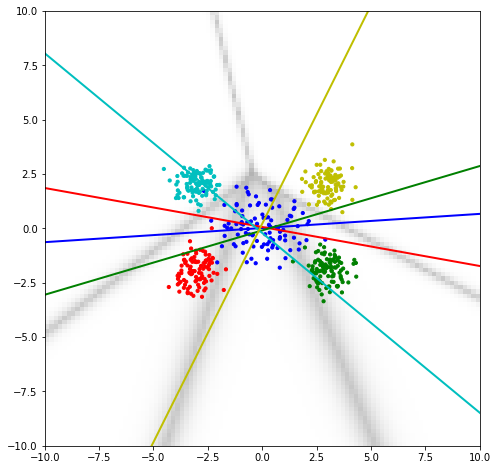

In [124]:
MAX = 10
X_MIN, X_MAX, X_NUM = -MAX, MAX, 100
Y_MIN, Y_MAX, Y_NUM = -MAX, MAX, 100

x = np.linspace(X_MIN, X_MAX, X_NUM, dtype=np.float32)
y = np.linspace(Y_MIN, Y_MAX, Y_NUM, dtype=np.float32)
x, y =  np.meshgrid(x, y)    

Xf  = model.fg(torch.tensor(X, dtype=torch.float32)).detach().to('cpu').numpy()

inp = torch.cat([torch.tensor(x).view(-1,1), torch.tensor(y).view(-1,1)], 1)

z = model(inp).detach().to('cpu')
#z = torch.argmax( torch.softmax(z, 1), 1 ).view(X_NUM, Y_NUM)
z = torch.softmax(z, 1).max(axis=1).values.view(X_NUM, Y_NUM)
    

weight = model.linear.weight.data.numpy()
bias = model.linear.bias.data.numpy()
   
    
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1); 
ax.set( xlim=(-MAX, MAX), ylim=(-MAX, MAX)) 
plt.imshow(z, extent=[X_MIN, X_MAX, Y_MIN, Y_MAX],  origin='lower', cmap='gray', alpha=0.3)
#plt.colorbar(aspect=50) 
class_colors = ['b', 'r', 'g', 'c','y']
cmap = colors.ListedColormap(class_colors)
#plt.scatter(X[:,0], X[:,1], c=Y,  s=10, cmap=cmap)       
plt.scatter(Xf[:,0], Xf[:,1], c=Y,  s=10, cmap=cmap)       

for i in range(len(bias)):
    n, s = weight[i], bias[i]
    x1 = -1000; y1 = -(n[0]*x1 + s)/n[1]
    x2 =  1000; y2 = -(n[0]*x2 + s)/n[1]
    plt.plot([x1,x2], [y1,y2], linewidth=2, c=class_colors[i])
    print(n, s)

plt.show()

## Losses

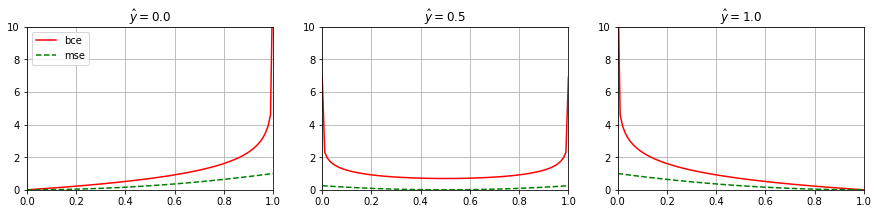

In [23]:
y = np.linspace(1e-6, 1.0-1e-6, num=100)
 
plt.figure (figsize=(15, 3), facecolor ='w') 
ax = plt.subplot(1, 3, 1); 
ax.set( xlim=(0, 1), ylim=(0, 10)) 
t = 0.
plt.plot(y, -t*np.log(y)-(1-t)*np.log(1-y), "-r")
plt.plot(y,  (y-t)**2, "--g")
plt.legend( ['bce', 'mse'], loc='upper left')
plt.title("$\hat{y}=0.0$")
plt.grid()

ax = plt.subplot(1, 3, 2); 
ax.set( xlim=(0, 1), ylim=(0, 10)) 
t = 0.5
plt.plot(y, -t*np.log(y)-(1-t)*np.log(1-y), "-r")
plt.plot(y,  (y-t)**2, "--g")
plt.title("$\hat{y}=0.5$")
plt.grid()

ax = plt.subplot(1, 3, 3); 
ax.set( xlim=(0, 1), ylim=(0, 10)) 
t = 1
plt.plot(y, -t*np.log(y)-(1-t)*np.log(1-y), "-r")
plt.plot(y,  (y-t)**2, "--g")
plt.title("$\hat{y}=1.0$")
plt.grid()

plt.show()

In [ ]:
- (yh * log (y) + (1-yh) )   (y-yh)**2

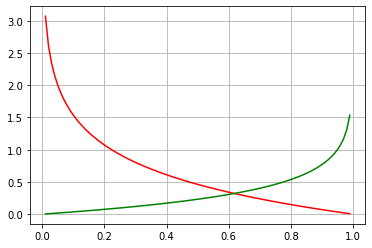

In [38]:
def m(y, t):
    return -( 14*t*np.log(y) + 7*(1-t)*np.log(1-y) ) / (14+7)

y = np.linspace(0.01, 0.99, 100)

plt.plot(y, m(y, 1), "-r")
plt.plot(y, m(y, 0), "-g")
plt.grid()
plt.show()


In [40]:
(0.64*m(y,1) + 0.36*m(y,0)).mean()

0.5343121774652186

In [51]:
(0.64*m(y**0.4,1) + 0.36*m(y**0.4,0)).mean()

0.365965509082709

In [54]:
(0.64*m(np.clip(y,0.3,0.7),1) + 0.36*m(np.clip(y,0.3,0.7),0)).mean()

0.41351495192828525

In [104]:
torch.softmax(torch.tensor([-1., 0.5*2., 0.]), axis=0)

tensor([0.0900, 0.6652, 0.2447])

In [140]:
x=torch.tensor([[1,2],
                [3,4],
                [5,6]], dtype=torch.float32)
y=torch.tensor([1,0,1])
#x.gather(1,y)

x[range(x.shape[0]), y] *= 10
x


tensor([[ 1., 20.],
        [30.,  4.],
        [ 5., 60.]])